In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(['Cabin','PassengerId','Ticket','Name'], axis=1, inplace=True)

In [4]:
df.isnull().any()
df.dropna(inplace=True)
df.reset_index(inplace=True)
df

,index,Survived,Class,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
707,885,0,3,female,39.0,0,5,29.1250,Q
708,886,0,2,male,27.0,0,0,13.0000,S
709,887,1,1,female,19.0,0,0,30.0000,S
710,889,1,1,male,26.0,0,0,30.0000,C


In [5]:
for i in range(len(df)):
    if df.iat[i,3]== 'male':
        df.iat[i,3] = 0
    else:
        df.iat[i,3] = 1
df['Sex'] = df['Sex'].astype(int)
df.drop(['index'],axis=1,inplace=True)
df

,Survived,Class,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,1,39.0,0,5,29.1250,Q
708,0,2,0,27.0,0,0,13.0000,S
709,1,1,1,19.0,0,0,30.0000,S
710,1,1,0,26.0,0,0,30.0000,C


<AxesSubplot:>

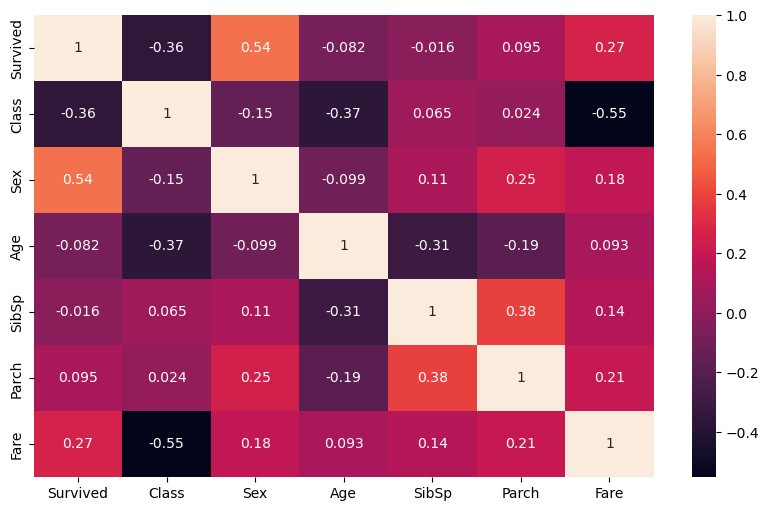

In [6]:
cor = df.corr()

plt.figure(figsize = (10,6))
sns.heatmap(cor, annot=True)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

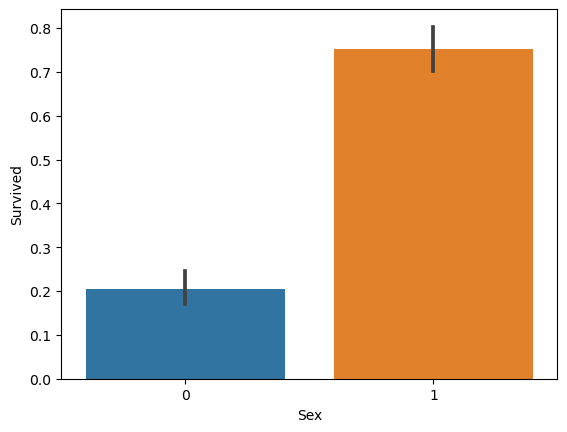

In [10]:
sns.barplot(data=df, x='Sex', y="Survived")

In [7]:
df

,Survived,Class,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,1,39.0,0,5,29.1250,Q
708,0,2,0,27.0,0,0,13.0000,S
709,1,1,1,19.0,0,0,30.0000,S
710,1,1,0,26.0,0,0,30.0000,C
